In [1]:
import xarray

In [2]:
ds = xarray.open_dataset('/home/scratch/fa23nwp/geo_em.d01.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 552, west_east: 640,
                 south_north_stag: 553, west_east_stag: 641, land_cat: 20,
                 soil_cat: 16, month: 12, dust_erosion_dimension: 3)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month,
                                dust_erosion_dimension
Data variables: (12/56)
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    ...          ...
    OL4         (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, west_east) float32 ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 ...
    EROD        (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    CLAYFRAC    (Time, south_north, west_east) float32 ...
    SANDFRAC    (Time, south_north, west_east) float32 ...
Attributes: (12/51)
    TITLE:                           OUTPUT FROM GEOGRID V4.3.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        641
    SOUTH-NORTH_GRID_DIMENSION:      553
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_LAI12M:                     1
    FLAG_VAR_SSO:                    1
    FLAG_LAKE_DEPTH:                 1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

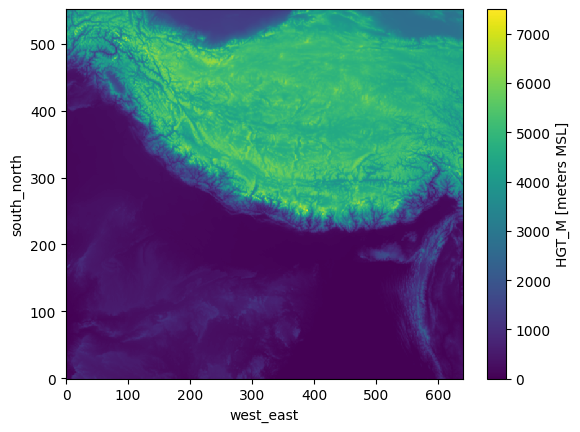

In [4]:
ds.HGT_M.plot()

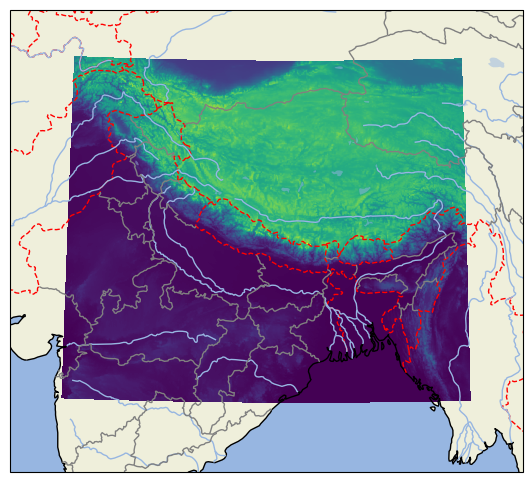

In [21]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection = cartopy.crs.LambertConformal(central_latitude = 30., central_longitude = 85.))
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='--', edgecolor='red')
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS)

states = cartopy.feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m', facecolor='none')

ax.add_feature(states, edgecolor='gray')
ax.pcolormesh(ds.CLONG.values[0,:,:], ds.CLAT.values[0,:,:], ds.HGT_M.values[0,:,:], transform= cartopy.crs.PlateCarree())

ax.set_extent([71, 98, 15, 40])
plt.show()